In [93]:
import pandas as pd

In [94]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Logistic_Reg\\bank_full.csv",sep=';')

In [95]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Converting string into numerical

In [96]:
df.job.replace(("admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services"),(0,1,2,3,4,5,6,7,8,9,10,11),inplace=True)

df.marital.replace(("married","divorced","single"),(0,1,2),inplace=True)
df.education.replace(("unknown","secondary","primary","tertiary"),(0,1,2,3),inplace=True)
df.default.replace(("yes","no"),(0,1),inplace=True)
df.housing.replace(("yes","no"),(0,1),inplace=True)
df.loan.replace(("yes","no"),(0,1),inplace=True)
df.contact.replace(("unknown","telephone","cellular"),(0,1,2),inplace=True)\
#df.month.replace(("jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec")(0,1,2,3,4,5,6,7,8,9,10,11))
df.poutcome.replace(("unknown","other","failure","success"),(0,1,2,3),inplace=True)
df.drop(["month"],axis=1,inplace=True)
df.drop(['pdays'],axis=1,inplace=True)

In [97]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y
0,58,3,0,3,1,2143,0,1,0,5,261,1,0,0,no
1,44,10,2,1,1,29,0,1,0,5,151,1,0,0,no
2,33,5,0,1,1,2,0,0,0,5,76,1,0,0,no
3,47,7,0,0,1,1506,0,1,0,5,92,1,0,0,no
4,33,1,2,0,1,1,1,1,0,5,198,1,0,0,no


In [98]:
df.y.replace(("no","yes"),(0,1),inplace=True)
DF=pd.DataFrame(df)
x1=df.iloc[:,0:14]
y=df.iloc[:,14]

DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y
0,58,3,0,3,1,2143,0,1,0,5,261,1,0,0,0
1,44,10,2,1,1,29,0,1,0,5,151,1,0,0,0
2,33,5,0,1,1,2,0,0,0,5,76,1,0,0,0
3,47,7,0,0,1,1506,0,1,0,5,92,1,0,0,0
4,33,1,2,0,1,1,1,1,0,5,198,1,0,0,0


In [99]:
columns=x1.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'previous',
       'poutcome'],
      dtype='object')

## For feature Selection

[0.12430961 0.06420025 0.02035582 0.03165706 0.00253643 0.12414695
 0.02255039 0.00948667 0.02443548 0.11206184 0.27740285 0.06870127
 0.03023754 0.08791785]


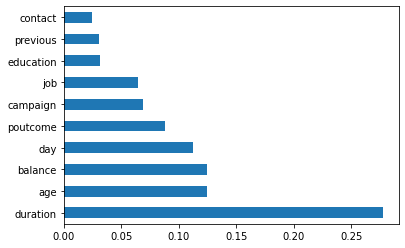

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Dropping the features which are less important

In [101]:
DF.drop(["marital"],axis=1,inplace=True)
DF.drop(["default"],axis=1,inplace=True)
DF.drop(["contact"],axis=1,inplace=True)
DF.drop(["poutcome"],axis=1,inplace=True)

In [102]:
DF.head()

,age,job,education,balance,housing,loan,day,duration,campaign,previous,y
0,58,3,3,2143,0,1,5,261,1,0,0
1,44,10,1,29,0,1,5,151,1,0,0
2,33,5,1,2,0,0,5,76,1,0,0
3,47,7,0,1506,0,1,5,92,1,0,0
4,33,1,0,1,1,1,5,198,1,0,0


In [103]:
x=DF.iloc[:,0:9]

### Splitting into train and test dataset

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [105]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy by using Confusion Matrix

In [106]:
y_pred=model.predict(x_train)

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y_train,y_pred)
print(confusion_matrics)

[[31370   576]
 [ 3504   718]]


In [108]:
((31321+775)/(31321+625+3447+775))*100

88.74142888741429

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31946
           1       0.55      0.17      0.26      4222

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



### Accuracy for Test data set

In [110]:
preds=model.predict(x_test)

In [111]:
y_test;

In [112]:
import numpy as np
np.mean(preds==y_test)*100

88.62103284308304

### auc curve

In [113]:
auc = roc_auc_score(y_train, model.predict(x_train))
auc

0.57601557792204

In [114]:
auc = roc_auc_score(y_test, model.predict(x_test))
auc

0.5778824289174929

In [115]:
auc = roc_auc_score(y, model.predict(x))
auc

0.5763927075077551

Text(0, 0.5, 'True Positive Rate')

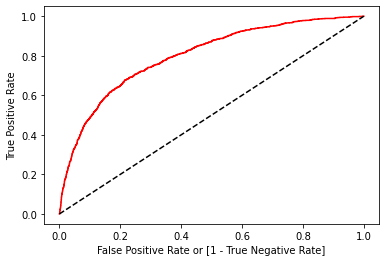

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, model.predict(x_test))

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [117]:
y_pred_df=pd.DataFrame({"Actual":y,"Predicted_y":model.predict(x)})
y_pred_df

,Actual,Predicted_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [118]:
np.mean(y==model.predict(x))*100

88.69965273937758